CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install py7zr
from keras.preprocessing.image import load_img,img_to_array
from py7zr import unpack_7zarchive
import shutil
import os
shutil.register_unpack_format('7zip', ['.7z'], unpack_7zarchive)


     |████████████████████████████████| 65 kB 752 kB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 357 kB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 13.7 MB/s eta 0:00:01


In [2]:
shutil.unpack_archive('/kaggle/input/cifar-10/train.7z', '/kaggle/working')

In [3]:
train_dir = os.listdir("./train");
train_dir_len = len(train_dir)
print(".\\train:\t",train_dir_len)
print("files:\t\t",train_dir[:3])

.\train:	 50000
files:		 ['24570.png', '4860.png', '14748.png']


In [4]:
train_labels = pd.read_csv('/kaggle/input/cifar-10/trainLabels.csv',dtype=str)
train_images = pd.DataFrame(columns = ['id','label','path'],dtype=str)
test_labels = pd.read_csv('/kaggle/input/cifar-10/sampleSubmission.csv')
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      50000 non-null  object
 1   label   50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
path_base = '/kaggle/working/train/'

for index in range(0,train_dir_len):
    path = path_base + str(index+1)+'.png'
    if os.path.exists(path):
        train_images = train_images.append([{ 'id': str(train_labels['id'].iloc[index]),'path': path, 'label':train_labels['label'].iloc[index]}])
        
train_images.head(2)

,id,label,path
0,1,frog,/kaggle/working/train/1.png
0,2,truck,/kaggle/working/train/2.png


In [6]:
train_images.head(2)

,id,label,path
0,1,frog,/kaggle/working/train/1.png
0,2,truck,/kaggle/working/train/2.png


In [9]:
display_groupby = train_images.groupby(['label']).count()
display_groupby.head(10)

,id,path
label,,
airplane,5000,5000
automobile,5000,5000
bird,5000,5000
cat,5000,5000
deer,5000,5000
dog,5000,5000
frog,5000,5000
horse,5000,5000
ship,5000,5000


In [10]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for name in  class_names:
    index = class_names.index(name)
    train_images.loc[train_images.label==name,'label'] = str(index)
        
display_groupby = train_images.groupby(['label']).count()
display_groupby.head(10)

,id,path
label,,
0,5000,5000
1,5000,5000
2,5000,5000
3,5000,5000
4,5000,5000
5,5000,5000
6,5000,5000
7,5000,5000
8,5000,5000


In [11]:
path_base = '/kaggle/working/train'
batch_size = 64
train_data_generator = ImageDataGenerator(
            rescale=1./255.,
            validation_split=0.2,
            horizontal_flip=True
            )
train_generator = train_data_generator.flow_from_dataframe(dataframe=train_images,
            directory="./train/",
            x_col="path",
            y_col="label",
            subset="training",
            batch_size=batch_size,
            shuffle=True,
            target_size=(32,32),
            class_mode="categorical")

Found 40000 validated image filenames belonging to 10 classes.


In [12]:
num_classes  = 10

In [13]:
validation_generator = train_data_generator.flow_from_dataframe(dataframe=train_images,
            directory="./train/",
            x_col="path",
            y_col="label",
            subset="validation",
            batch_size=batch_size,
            shuffle=True,
            target_size=(32,32),
            class_mode="categorical")

Found 10000 validated image filenames belonging to 10 classes.


In [14]:
train_size = len(train_generator.filenames)
validation_size = len(validation_generator.filenames)
print('validation_size:\t',validation_size)
print('train_size:\t\t',train_size)

validation_size:	 10000
train_size:		 40000


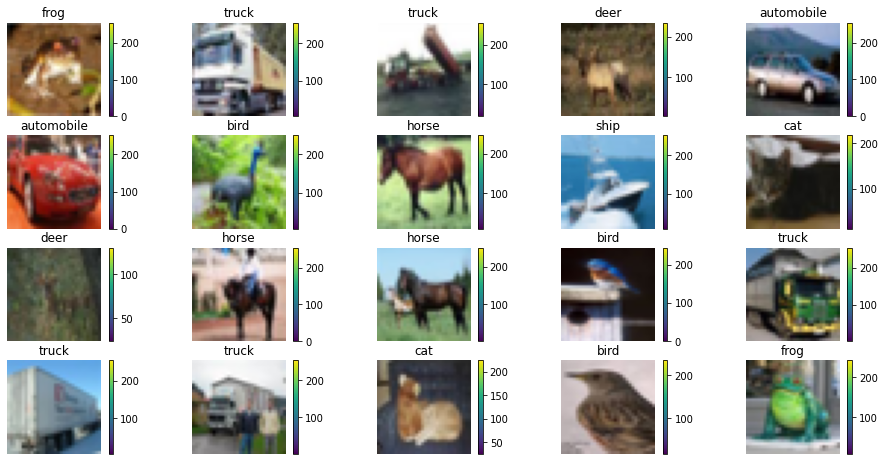

In [15]:
index = 0    
fig = plt.figure(figsize = (16,10))
for item in train_images.values[:20]:
    index += 1
    plt.subplot(5, 5, index)
    test_path = item[2]
    test_image = load_img(test_path, target_size=(32,32))
    plt.imshow(test_image)
    plt.colorbar()
    plt.grid(False)
    plt.axis("off")
    plt.title(class_names[int(item[1])])
plt.show()

In [16]:
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32,  3)))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (2, 2), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(1, 1))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (2, 2), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(1, 1))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
          optimizer=keras.optimizers.RMSprop(lr=0.001, decay = 1e-3, momentum = 0.3),
          metrics=['accuracy'])
    
model.input 

<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'conv2d_input')>

In [17]:

history = model.fit(train_generator, 
                    steps_per_epoch=(train_size//batch_size),
                    epochs= 5,
                    validation_data=validation_generator,
                   validation_steps=(validation_size//batch_size)
                   )

Epoch 1/5
625/625 [==============================] - 293s 466ms/step - loss: 1.5169 - accuracy: 0.4657 - val_loss: 1.1034 - val_accuracy: 0.6046
Epoch 2/5
625/625 [==============================] - 284s 455ms/step - loss: 0.9279 - accuracy: 0.6773 - val_loss: 1.0162 - val_accuracy: 0.6469
Epoch 3/5
625/625 [==============================] - 290s 464ms/step - loss: 0.8078 - accuracy: 0.7186 - val_loss: 0.7723 - val_accuracy: 0.7316
Epoch 4/5
625/625 [==============================] - 285s 456ms/step - loss: 0.7472 - accuracy: 0.7416 - val_loss: 0.7604 - val_accuracy: 0.7331
Epoch 5/5
625/625 [==============================] - 285s 457ms/step - loss: 0.7033 - accuracy: 0.7560 - val_loss: 0.6955 - val_accuracy: 0.7539


In [18]:
test_labels.head(2)

,id,label
0,1,cat
1,2,cat


In [19]:
if os.path.exists("./test"):
    shutil.rmtree("./test")
if os.path.exists("./train"):
    shutil.rmtree("./train")
if not os.path.exists("./data"):
    os.mkdir("./data")

shutil.unpack_archive('/kaggle/input/cifar-10/test.7z', '/kaggle/working/data')

In [20]:
test_dir = os.listdir("./data/test");
test_dir_len = len(test_dir)
print('min:\t',min(test_dir))
print('max:\t',max(test_dir))
print(".\\test:\t",test_dir_len)
print("files:\t\t",test_dir[:3])

min:	 1.png
max:	 99999.png
.\test:	 300000
files:		 ['248868.png', '121554.png', '187751.png']


In [21]:
test_data_generator = ImageDataGenerator(rescale=1./255.)
test_generator = test_data_generator.flow_from_directory(directory='/kaggle/working/data',
            batch_size=batch_size,
            shuffle=False,color_mode='rgb',
            target_size=(32,32),
            class_mode=None)

Found 300000 images belonging to 1 classes.


In [22]:
predict_test = model.predict_generator(test_generator)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [23]:
predict_generator = np.argmax(predict_test, axis=1)
print(class_names)
predict_generator[:2],[class_names[int(i)] for i in predict_generator[:2]]

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(array([2, 3]), ['bird', 'cat'])

In [24]:
submission = pd.DataFrame(columns = ['id','label'],dtype=str)
submission["label"] = [class_names[int(i)] for i in predict_generator]
submission["id"] = [ (''.join(filter(str.isdigit, name ))) for name in test_generator.filenames]
submission.head(101)

,id,label
0,1,bird
1,10,cat
2,100,bird
3,1000,deer
4,10000,frog
...,...,...
96,100083,automobile
97,100084,cat
98,100085,frog
99,100086,automobile


In [25]:
 submission.values[50:100]

array([['100041', 'deer'],
       ['100042', 'dog'],
       ['100043', 'bird'],
       ['100044', 'ship'],
       ['100045', 'dog'],
       ['100046', 'deer'],
       ['100047', 'cat'],
       ['100048', 'frog'],
       ['100049', 'bird'],
       ['10005', 'cat'],
       ['100050', 'cat'],
       ['100051', 'dog'],
       ['100052', 'deer'],
       ['100053', 'truck'],
       ['100054', 'automobile'],
       ['100055', 'truck'],
       ['100056', 'frog'],
       ['100057', 'horse'],
       ['100058', 'frog'],
       ['100059', 'bird'],
       ['10006', 'horse'],
       ['100060', 'deer'],
       ['100061', 'ship'],
       ['100062', 'truck'],
       ['100063', 'ship'],
       ['100064', 'deer'],
       ['100065', 'airplane'],
       ['100066', 'ship'],
       ['100067', 'cat'],
       ['100068', 'truck'],
       ['100069', 'dog'],
       ['10007', 'horse'],
       ['100070', 'bird'],
       ['100071', 'automobile'],
       ['100072', 'bird'],
       ['100073', 'dog'],
       ['100074',

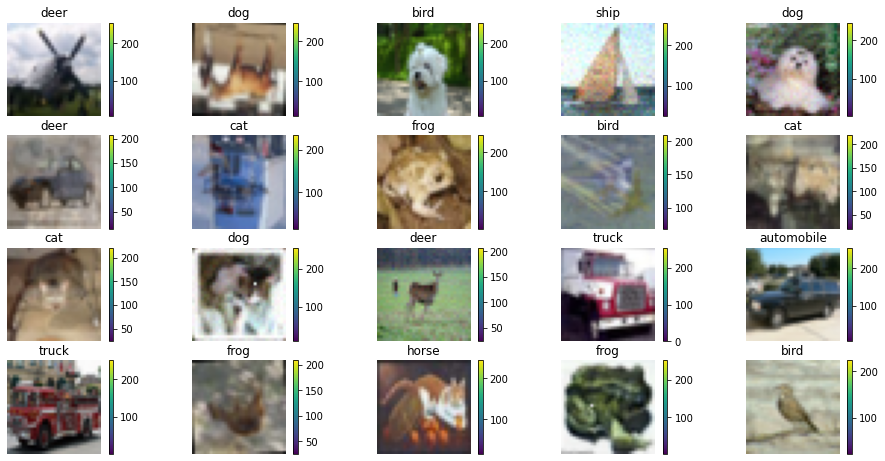

In [26]:
index = 0    
fig = plt.figure(figsize = (16,10))
for item in submission.values[50:70]:
    index += 1
    plt.subplot(5, 5, index)
    test_path = '/kaggle/working/data/test/'+item[0]+'.png'
    test_image = load_img(test_path, target_size=(32,32))
    plt.imshow(test_image)
    plt.colorbar()
    plt.grid(False)
    plt.axis("off")
    plt.title(item[1])
plt.show()

In [27]:
submission.to_csv("submission.csv",index=False)

In [28]:
 shutil.rmtree("./data")